random elastic deformation
intensity (random & normalised)
randomgamma


In [ ]:
import matplotlib.pyplot as plt
import imageio.v3 as iio
import SimpleITK as sitk
import torchio as tio
import numpy as np
import elastix
import os

In [13]:

# General file paths
BASE_PATH = "../DevelopmentData" # Change to developmentdata directory
PATIENT_PATHS = [os.path.join(BASE_PATH, f) for f in os.listdir(BASE_PATH) if not f.startswith('.')]
ELASTIX_PATH = os.path.join(r'C:\Users\20182717\Documents\TUe\Software\Elastix\elastix-5.0.0-win64\elastix.exe')
TRANSFORMIX_PATH = os.path.join(r'C:\Users\20182717\Documents\TUe\Software\Elastix\elastix-5.0.0-win64\transformix.exe')

if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')
if not os.path.exists(TRANSFORMIX_PATH):
    raise IOError('Transformix cannot be found, please set the correct TRANSFORMIX_PATH.')

# Load all patient data
mr_prostate_data = []
mask_data = []
for path in PATIENT_PATHS:
    # Individual path per patient
    prostate_path = os.path.join(path, "mr_bffe.mhd")
    mask_path = os.path.join(path, "prostaat.mhd")
    # Store image data in list
    mr_prostate_data.append(iio.imread(prostate_path))
    mask_data.append(iio.imread(mask_path))

# Convert to numpy array
mr_prostate_data = np.array(mr_prostate_data)
mask_data = np.array(mask_data)

# Define the patient index for "fixed" and "moving"
fixed_image_idx = 0
moving_image_idx = 1

# Fixed image
fixed_image_path = os.path.join(PATIENT_PATHS[fixed_image_idx], "mr_bffe.mhd")
fixed_image_mask_path = os.path.join(PATIENT_PATHS[fixed_image_idx], "prostaat.mhd")
fixed_image = mr_prostate_data[fixed_image_idx,...]
fixed_image_mask = mask_data[fixed_image_idx,...]

# Moving image
moving_image_path = os.path.join(PATIENT_PATHS[moving_image_idx], "mr_bffe.mhd")
moving_image_mask_path = os.path.join(PATIENT_PATHS[moving_image_idx], "prostaat.mhd")
moving_image = mr_prostate_data[moving_image_idx,...]
moving_image_mask = mask_data[moving_image_idx,...]

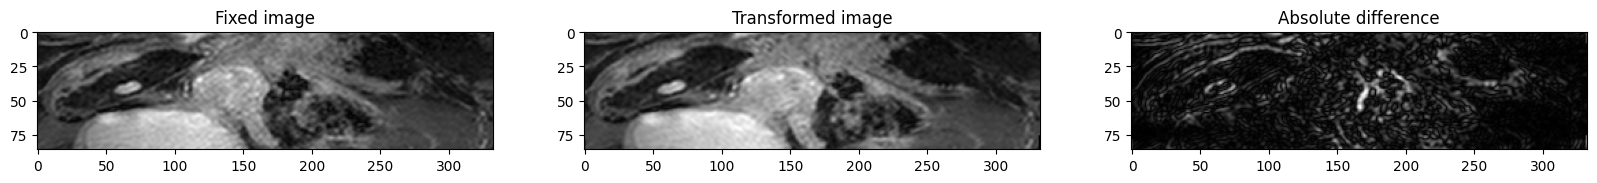

In [34]:
from torchio import RandomElasticDeformation
r_el_def = RandomElasticDeformation(
    num_control_points=(7, 7, 7),  # or just 7
    locked_borders=2,
)
reldef_im = r_el_def(sitk.ReadImage(fixed_image_path))
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(sitk.GetArrayViewFromImage(reldef_im)[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-sitk.GetArrayViewFromImage(reldef_im)[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

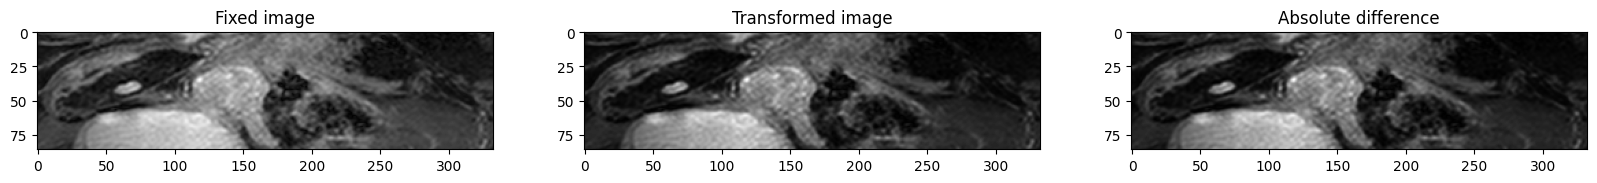

In [42]:
r_gam_tr = tio.transforms.RandomGamma(log_gamma=(-0.5, 0.5))
rgam_im = r_gam_tr(sitk.ReadImage(fixed_image_path))
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(sitk.GetArrayViewFromImage(rgam_im)[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-sitk.GetArrayViewFromImage(rgam_im)[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

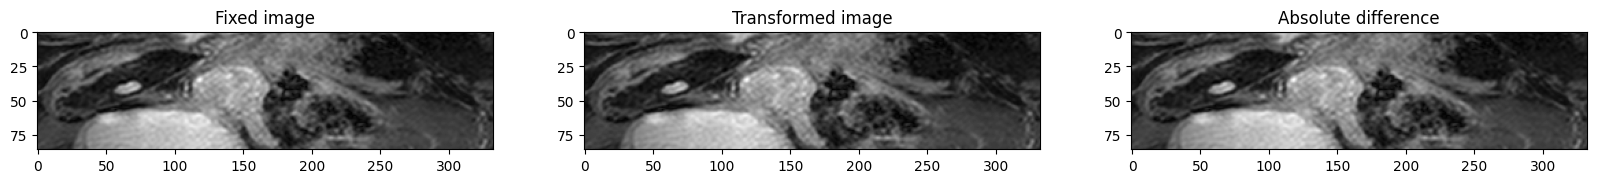

In [54]:
norm_im = sitk.RescaleIntensity(sitk.ReadImage(fixed_image_path), 0, 255)
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(sitk.GetArrayViewFromImage(norm_im)[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-sitk.GetArrayViewFromImage(norm_im)[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");

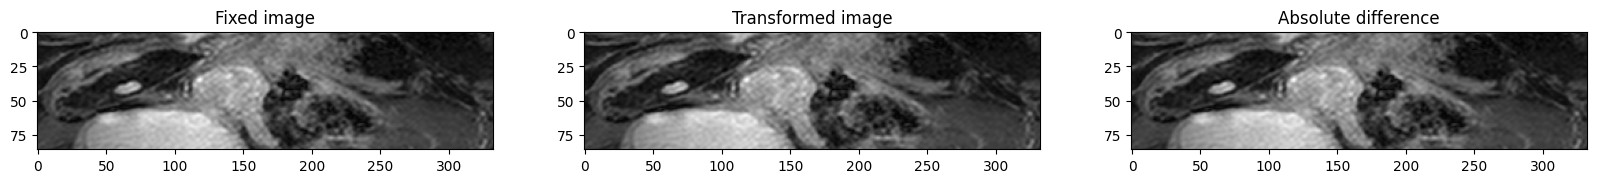

In [55]:
img = sitk.ReadImage(fixed_image_path)
norm_filter = sitk.NormalizeImageFilter()
norm_im = norm_filter.Execute(img)
slice = 150
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax[0].imshow(fixed_image[:,:,slice], cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(sitk.GetArrayViewFromImage(norm_im)[:,:,slice], cmap='gray')
ax[1].set_title('Transformed image')
ax[2].imshow(abs(fixed_image[:,:,slice]-sitk.GetArrayViewFromImage(norm_im)[:,:,slice]), cmap='gray')
ax[2].set_title("Absolute difference");